# Figures 2b & 2c:
## Elephant Butte Water Level and Sedimentation History
- Daily water level and incoming sediment load data, as well as active capacity over time, are imported and processed
- Link to Elephant Butte water level data download: https://waterdatafortexas.org/reservoirs/individual/elephant-butte
- Link to legacy webpage where USGS sediment data was downloaded: https://waterdata.usgs.gov/nwis/inventory/?site_no=08358400&agency_cd=USGS

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
from matplotlib.dates import DateFormatter, AutoDateLocator
import matplotlib.dates as mdates

## First import the data

### 1. Elephant Butte water level data

In [2]:
# Load data from file
eb = pd.read_csv('../Hydro_Data/TWDB/ElephantButte_1916-2022.csv', skiprows=57) 

# Convert date column to to_datetime pandas object
eb['date']= pd.to_datetime(eb['date'], errors='coerce', yearfirst=True)

# Convert water level from ft to m
eb['water_level_m'] = eb['water_level']*0.3048
eb

# Preview dataframe
eb.head()

,date,water_level,surface_area,reservoir_storage,conservation_storage,percent_full,conservation_capacity,dead_pool_capacity,water_level_m
0,1916-01-01,4307.7,6755.45,161953.0,161953,8.1,2010900.0,0.0,1312.98696
1,1916-01-02,4307.7,6755.45,161953.0,161953,8.1,2010900.0,0.0,1312.98696
2,1916-01-03,4307.7,6755.45,161953.0,161953,8.1,2010900.0,0.0,1312.98696
3,1916-01-04,4307.9,6789.12,163307.0,163307,8.1,2010900.0,0.0,1313.04792
4,1916-01-05,4308.1,6822.96,164668.0,164668,8.2,2010900.0,0.0,1313.10888


Note that some water_level data had to be manually removed due to errors in data file (in data prior to 1920)

### 2. Elephant Butte active capacity over time

In [3]:
# Load data from file
ac = pd.read_csv('../Hydro_Data/USBR/EBR_Capacity_Loss_1916-2017.csv')

# Convert data from acre-ft to cubic m
ac['Active capacity (m^3)'] = ac['Active capacity (acre-feet)']*1233.48

# Also calculated cubic km
ac['Active capacity (km^3)'] = ac['Active capacity (m^3)']*1e-9

# Create column with survey year
ac['Year'] = pd.to_datetime(ac['Year'], yearfirst=True)

# View data
ac

,Year,Active capacity (acre-feet),Active capacity (m^3),Active capacity (km^3)
0,1916-06-01,2634800,3.249973e+09,3.249973
1,1947-06-01,2197600,2.710696e+09,2.710696
2,1957-06-01,2206780,2.722019e+09,2.722019
3,1969-06-01,2137219,2.636217e+09,2.636217
4,1980-06-01,2110298,2.603010e+09,2.603010
5,1988-06-01,2065010,2.547149e+09,2.547149
6,1999-06-01,2023358,2.495772e+09,2.495772
7,2007-06-01,2024586,2.497286e+09,2.497286
8,2017-06-01,2010900,2.480405e+09,2.480405


### 3. San Marcial incoming sediment load

In [4]:
# Load data from file
sm = pd.read_csv('../Hydro_Data/USGS/San_Marcial_08358500/08358500_1957-2022.csv', skiprows=32)

# Rename columns
sm = sm.rename(columns={'226665_80154_00003':'Mean SSC (mg/l)', '226666_80155_00003':'Mean SSD (st/d)','99945_00060_00003':'Mean Qw (f^3/s)'})

# Convert date column to to_datetime pandas object
sm['datetime']= pd.to_datetime(sm['datetime'], errors='coerce')

# Delete leap days so years are equal in length
sm = sm[~((sm['datetime'].dt.month == 2) &(sm['datetime'].dt.day ==29))]

# Convert sediment discharge from short tons to metric tons
sm['Mean SSD (mt/d)'] = sm['Mean SSD (st/d)']*0.907185

# Select data between 2011-2021
sm_qs_12_21 = sm[-4015:-365]

# Preview data
sm_qs_12_21.head()

,agency_cd,site_no,datetime,Mean SSC (mg/l),226665_80154_00003_cd,Mean SSD (st/d),226666_80155_00003_cd,Mean Qw (f^3/s),99945_00060_00003_cd,Mean SSD (mt/d)
20088,USGS,8358400,2012-01-01,1580.0,A,2260.0,A,529.0,A,2050.23810
20089,USGS,8358400,2012-01-02,1500.0,A,1990.0,A,492.0,A,1805.29815
20090,USGS,8358400,2012-01-03,1210.0,A,1350.0,A,413.0,A,1224.69975
20091,USGS,8358400,2012-01-04,969.0,A,1080.0,A,412.0,A,979.75980
20092,USGS,8358400,2012-01-05,935.0,A,1010.0,A,400.0,A,916.25685


## Make Figure 2b

In [5]:
# Select elephant butte water level only over the past decade (2012-2022)
eb_12_21 = eb[-4018:-365]

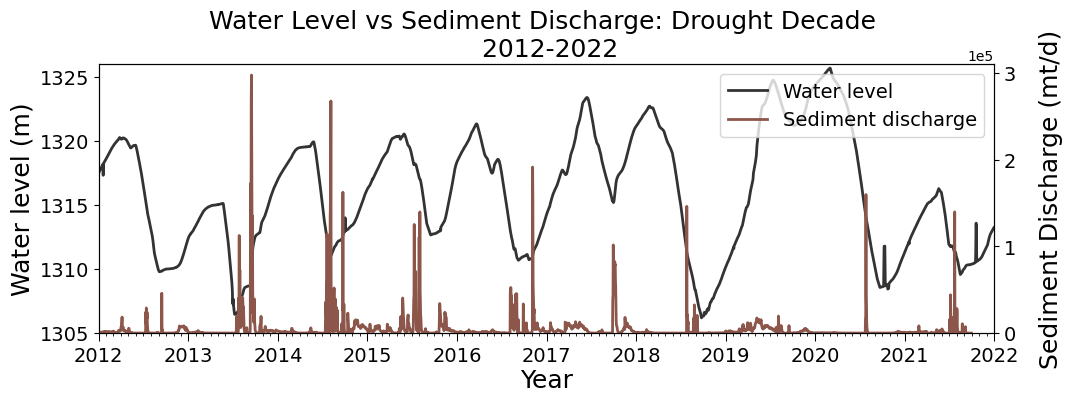

In [6]:
# Build the figure
fig = plt.figure(figsize = (10.8, 4.2))
ax = fig.add_subplot()

# Add water level data for left axis
lns1 = ax.plot(eb_12_21['date'], eb_12_21['water_level_m'], '-', color='k',label = 'Water level', linewidth=2, alpha=0.8)

# Format axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add secondary y axis
ax2 = ax.twinx()

# Add incoming sediment load data for right axis
lns2 = ax2.plot(sm_qs_12_21['datetime'], sm_qs_12_21['Mean SSD (mt/d)'],'-', linewidth = 2, color='tab:brown',label = 'Sediment discharge')
ax2.xaxis.set_major_formatter(DateFormatter("%Y"))

# Import legend items
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, fontsize=14, facecolor='white', loc='upper right')

# Format plot
left = date(2012, 1, 1)
right = date(2022, 1, 1)

ax.set_xlabel('Year', size = 18), ax.set_ylabel('Water level (m)', size = 18)
ax.xaxis.set_tick_params(labelsize=14, length=6, width=0.75), ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_label_coords(.5,-.13)
ax.set_ylim(1305, 1326)

ax2.set_ylabel('Sediment Discharge (mt/d)', size = 18)
ax2.ticklabel_format(axis='y', style='sci', scilimits=(0,5))
ax2.yaxis.set_tick_params(labelsize=14)
ax2.xaxis.set_minor_locator(mdates.MonthLocator())
ax2.xaxis.set_tick_params(which='minor', length=6, width=0.5)
ax2.set_ylim(0,310000)
ax2.yaxis.set_label_coords(1.05,0.5)

plt.title('Water Level vs Sediment Discharge: Drought Decade \n 2012-2022', size = 18)
plt.gca().set_xbound(left, right)
plt.tight_layout()

# Save figure to folder
fig.savefig('Saved_Figures/Figure2b', dpi=150)

plt.show()

## Make Figure 2c

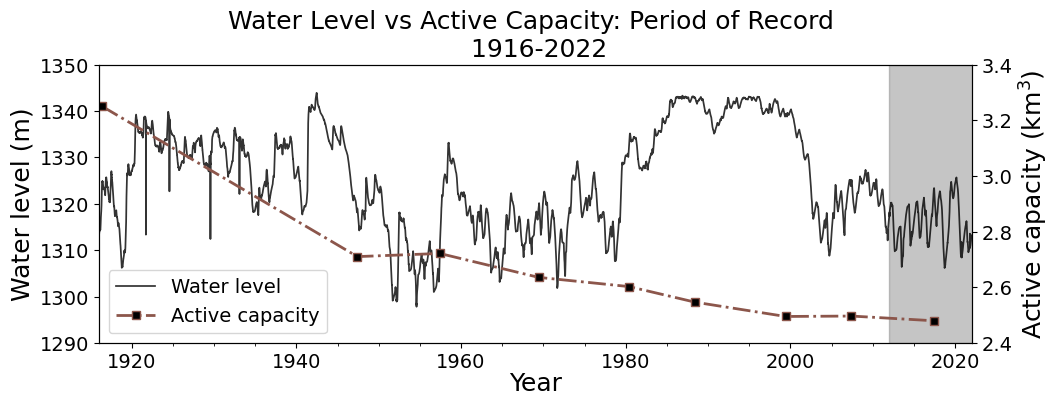

In [7]:
# Build the figure
fig = plt.figure(figsize = (10.7, 4.2))
ax = fig.add_subplot()

# Add grey band for when dates overlaps with Figure 2B 
plt.axvspan(pd.Timestamp('2012-01-01'), pd.Timestamp('2023-2-1'), color='grey', alpha = 0.45)

# Add data
lns1 = ax.plot(eb['date'][:-365], eb['water_level_m'][:-365], color = 'k', linewidth=1.25, linestyle='-', alpha=0.8, label='Water level')

# Add second y axis
ax2 = ax.twinx()
lns2 = ax2.plot(ac['Year'], ac['Active capacity (km^3)'], color = 'tab:brown', marker='s', linestyle= '-.', markerfacecolor='k', linewidth=2, label = 'Active capacity')

# Import legend items
lns = lns1  + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs,  fontsize=14, facecolor='white', loc='lower left')

# Format plot
ax.set_xlabel('Year', size = 18), ax.set_ylabel('Water level (m)', size = 18)
ax.xaxis.set_tick_params(labelsize=14), ax.yaxis.set_tick_params(labelsize=14)
ax.set_ylim(1290,1350)

ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y")), ax2.yaxis.set_tick_params(labelsize=14)
ax2.set_ylabel('Active capacity (km$^3$)', size = 18)
ax.xaxis.set_label_coords(.5,-.1)
ax2.set_xlim(pd.Timestamp('1916-01-01'), pd.Timestamp('2022-12-31')), ax2.set_ylim(2.4,3.4)

ax2.xaxis.set_major_locator(mdates.YearLocator(20)), ax2.xaxis.set_tick_params(which='major', length=6, width=0.75)
ax2.xaxis.set_minor_locator(mdates.YearLocator(5)), ax2.xaxis.set_tick_params(which='minor', length=4, width=0.5)

left = date(1916, 1, 1)
right = date(2022, 1, 1)
plt.gca().set_xbound(left, right)

plt.title('Water Level vs Active Capacity: Period of Record \n 1916-2022', size = 18)
plt.tight_layout()

# Save figure to folder
plt.savefig('Saved_Figures/Figure2c.png', dpi=150)

plt.show()